# Исследование возможности открытия роботизированного кафе

Презентация: https://disk.yandex.ru/i/-_fKNLD0trIMXA

Нам необходимо провести исследование рынка общепита и выяснить может ли быть востребовано кафе полностью роботизированное с минимальным присутствием людей в лице обслуживающего персонала

Разделим ход выполнения работ, на 5 этапов: Просмотр данных, предобработка данных, исследовательский анализ данных, вывод, презентация.

В таблице rest_data имеются следующие столбцы:
 - id — идентификатор объекта;
 - object_name — название объекта общественного питания;
 - chain — сетевой ресторан;
 - object_type — тип объекта общественного питания;
 - address — адрес;
 - number — количество посадочных мест.

## Просмотр общих данных датасета

Импортируем необходимые библиотеки и посмотрим на датасет

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from io import BytesIO
import requests
import sys

%matplotlib inline
%config InlineBackend.figure_format='retina'

In [2]:
if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")

In [3]:
try:
    df = pd.read_csv('/datasets/rest_data.csv') #путь яндекса
except:
    df = pd.read_csv('https://code.s3.yandex.net/datasets/rest_data.csv') # если же ошибка - мой путь

In [4]:
df_temp=df.copy()

In [5]:
def start(data):
    '''Функция для первоначального просмотра датасета'''
    display(data.head()) 
    display(data.tail()) 
    data.info()
    display(data.columns.str.lower())
    display(data.duplicated().sum())
    display(pd.DataFrame((data.isna().mean()*100).round(2)).style.background_gradient('coolwarm'))

In [6]:
start(df_temp)

,id,object_name,chain,object_type,address,number
0,151635,СМЕТАНА,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48
1,77874,Родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35
2,24309,Кафе «Академия»,нет,кафе,"город Москва, Абельмановская улица, дом 6",95
3,21894,ПИЦЦЕТОРИЯ,да,кафе,"город Москва, Абрамцевская улица, дом 1",40
4,119365,Кафе «Вишневая метель»,нет,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50


,id,object_name,chain,object_type,address,number
15361,208537,Шоколадница,да,кафе,"город Москва, 3-й Крутицкий переулок, дом 18",50
15362,209264,Шоколадница,да,кафе,"город Москва, улица Земляной Вал, дом 33",10
15363,209186,Шоколадница,да,кафе,"город Москва, улица Земляной Вал, дом 33",20
15364,221900,Шоколадница,да,кафе,"город Москва, поселение Московский, Киевское ш...",36
15365,222535,Шоколадница,да,кафе,"город Москва, Ходынский бульвар, дом 4",10


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15366 entries, 0 to 15365
Data columns (total 6 columns):
id             15366 non-null int64
object_name    15366 non-null object
chain          15366 non-null object
object_type    15366 non-null object
address        15366 non-null object
number         15366 non-null int64
dtypes: int64(2), object(4)
memory usage: 720.4+ KB


Index(['id', 'object_name', 'chain', 'object_type', 'address', 'number'], dtype='object')

0

,0
id,0
object_name,0
chain,0
object_type,0
address,0
number,0


Мы видим, что в таблице отсутствуют пропущенные значения, тип данных указан правильно, так же отсутствуют явные дубликаты что может говорить о том, что данные составлены правильно, единственно что смущает: это запись в столбце object_name, но скорей всего это не отразится на конечном результате, ведь есть id заведения, а оно уникальное для каждого заведения.

## Предобработка данных

Проверим на неявные дубликаты таблицу и если они есть, избавимся от них

In [7]:
df[df['address'].duplicated()]['id'].count() / 15366*100

40.72627879734479

Мы видим, что в колонке адрес есть 40% дубликатов, что не может не смутить, но так же может в одном здании находиться несколько заведений, проверим.

In [8]:
df[df['address'].duplicated()]

,id,object_name,chain,object_type,address,number
8,20958,КПФ СЕМЬЯ-1,нет,столовая,"город Москва, Авиамоторная улица, дом 8, строе...",150
9,28858,Столовая МТУСИ,нет,столовая,"город Москва, Авиамоторная улица, дом 8, строе...",120
22,26931,Долина Чайхона,нет,кафе,"город Москва, Алтуфьевское шоссе, дом 14",150
25,81554,Домино'с Пицца,да,кафе,"город Москва, Алтуфьевское шоссе, дом 56",24
37,24968,Му-Му,да,кафе,"город Москва, улица Арбат, дом 4, строение 1",125
...,...,...,...,...,...,...
15361,208537,Шоколадница,да,кафе,"город Москва, 3-й Крутицкий переулок, дом 18",50
15362,209264,Шоколадница,да,кафе,"город Москва, улица Земляной Вал, дом 33",10
15363,209186,Шоколадница,да,кафе,"город Москва, улица Земляной Вал, дом 33",20
15364,221900,Шоколадница,да,кафе,"город Москва, поселение Московский, Киевское ш...",36


In [9]:
df_temp['address'].str.strip()#убираем пробелы с начала и конца строки
df_temp['object_name'].str.strip()

0                       СМЕТАНА
1                        Родник
2               Кафе «Академия»
3                    ПИЦЦЕТОРИЯ
4        Кафе «Вишневая метель»
                  ...          
15361               Шоколадница
15362               Шоколадница
15363               Шоколадница
15364               Шоколадница
15365               Шоколадница
Name: object_name, Length: 15366, dtype: object

In [10]:
df.loc[8,'address']

'город Москва, Авиамоторная улица, дом 8, строение 1'

In [11]:
df.loc[df['address'] == 'город Москва, Авиамоторная улица, дом 8, строение 1']

,id,object_name,chain,object_type,address,number
7,20957,Буфет МТУСИ,нет,столовая,"город Москва, Авиамоторная улица, дом 8, строе...",90
8,20958,КПФ СЕМЬЯ-1,нет,столовая,"город Москва, Авиамоторная улица, дом 8, строе...",150
9,28858,Столовая МТУСИ,нет,столовая,"город Москва, Авиамоторная улица, дом 8, строе...",120


Мы видим что по одному адресу располагаются 3 разных заведения, о чем и говорилось ранее

Проверим таблицу на неявные дубликаты

In [12]:
(df[['object_name', 'chain', 'object_type', 'address', 'number']].duplicated().sum() /df.shape[0]*100).round(2)

0.53

Мы видим, что количество дубликатов от общего количества составляет всего 0,5 % следовательно эти данные можно смело удалить, они никак не повлияют на ход нашего исследования

In [13]:
df_temp = df_temp.drop_duplicates(subset=['object_name', 'chain', 'object_type', 'address', 'number'], keep="last")

In [14]:
df_temp.reset_index = True

In [15]:
(df_temp[['object_name', 'chain', 'object_type', 'address', 'number']].duplicated().sum() /df.shape[0]*100).round(2)

0.0

Вывод: Мы проверили таблицу на неявные дубликаты, как оказалось они присутствуют и в небольшом количестве всего 0,53% от общего количества поэтому их просто удалили. Так же подтвердилась теория, что в одном здании могут быть больше одного заведения.

## Исследовательский анализ данных

Проведем анализ данных и определим действительно ли роботизированной кафе будет вызывать интерес у клиентов

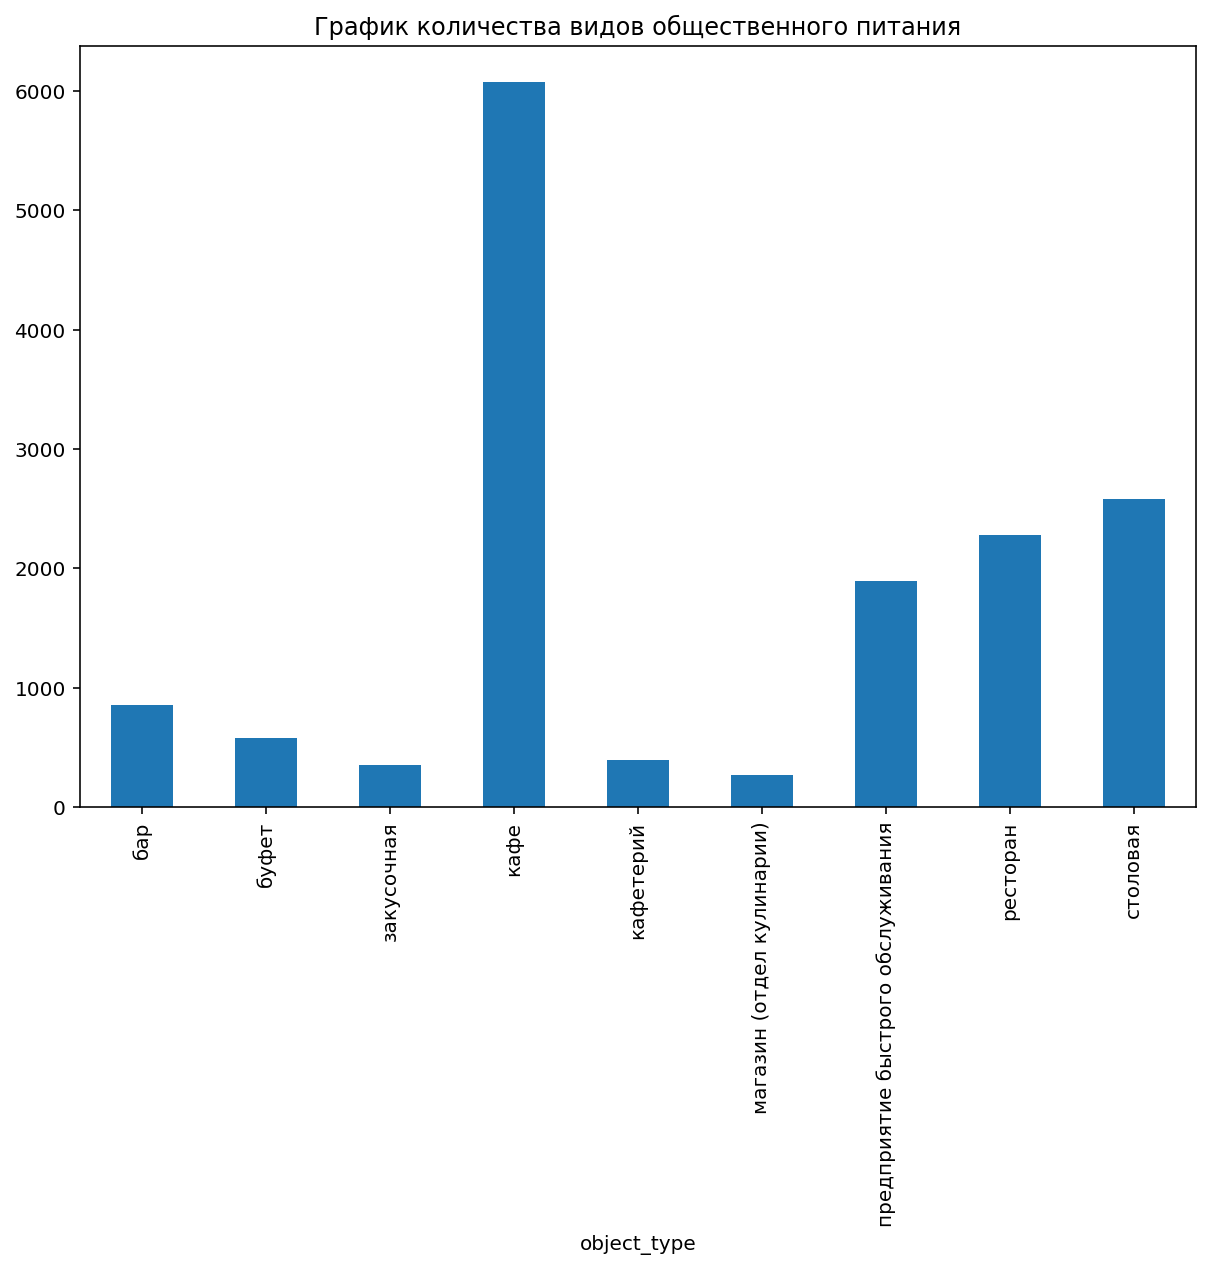

In [16]:
df_temp.groupby('object_type')['id'].count().plot(kind='bar',
                                             title='График количества видов общественного питания',
                                             
                                             figsize=(10,7)
                                             )

plt.show()


Из графика мы видим, что самые популярные заведения по количеству в столице - это все таки кафе, причем опережают своих предшественников на довольно значительное значение.

In [17]:
df_temp.groupby('chain')['id'].count()

chain
да      2964
нет    12320
Name: id, dtype: int64

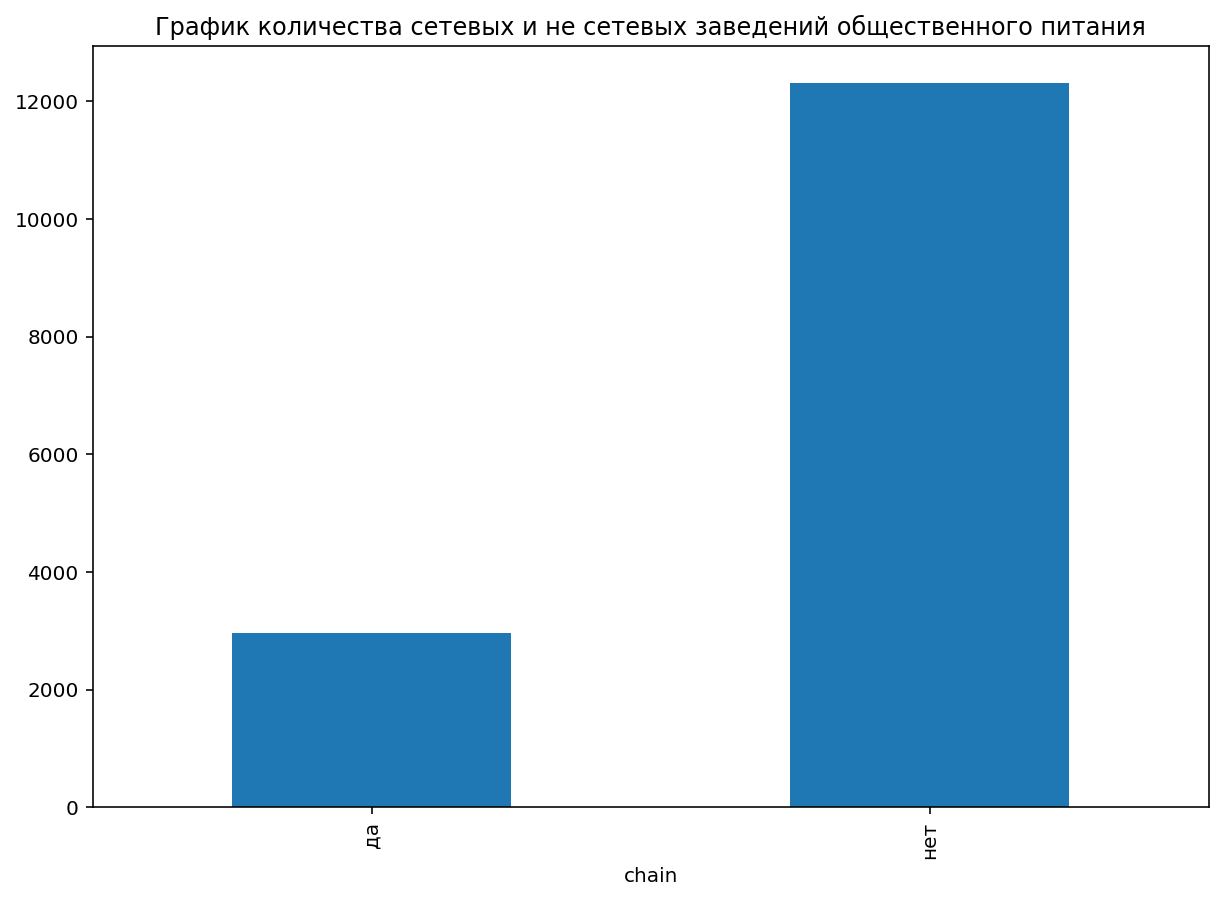

In [18]:
df_temp.groupby('chain')['id'].count().plot(kind='bar',\
            title='График количества сетевых и не сетевых заведений общественного питания',figsize=(10,7)
    )

plt.show()

Мы видим, что основное количество - это одиночные заведения, с очень большим отрывом

Построим график отношения сетевых заведений к несетевым

In [19]:
df_temp.head()

,id,object_name,chain,object_type,address,number
0,151635,СМЕТАНА,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48
1,77874,Родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35
2,24309,Кафе «Академия»,нет,кафе,"город Москва, Абельмановская улица, дом 6",95
3,21894,ПИЦЦЕТОРИЯ,да,кафе,"город Москва, Абрамцевская улица, дом 1",40
4,119365,Кафе «Вишневая метель»,нет,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50


In [20]:
share_chain_all = df_temp.groupby(['object_type'])['id'].count().to_frame().join(df_temp[df_temp['chain']=='да'].\
         groupby(['object_type'])['number'].count().to_frame())
share_chain_all['chain'] = (share_chain_all['number'] / share_chain_all['id']).round(2)
share_chain_all = share_chain_all.reset_index().sort_values(by='chain',ascending=False)

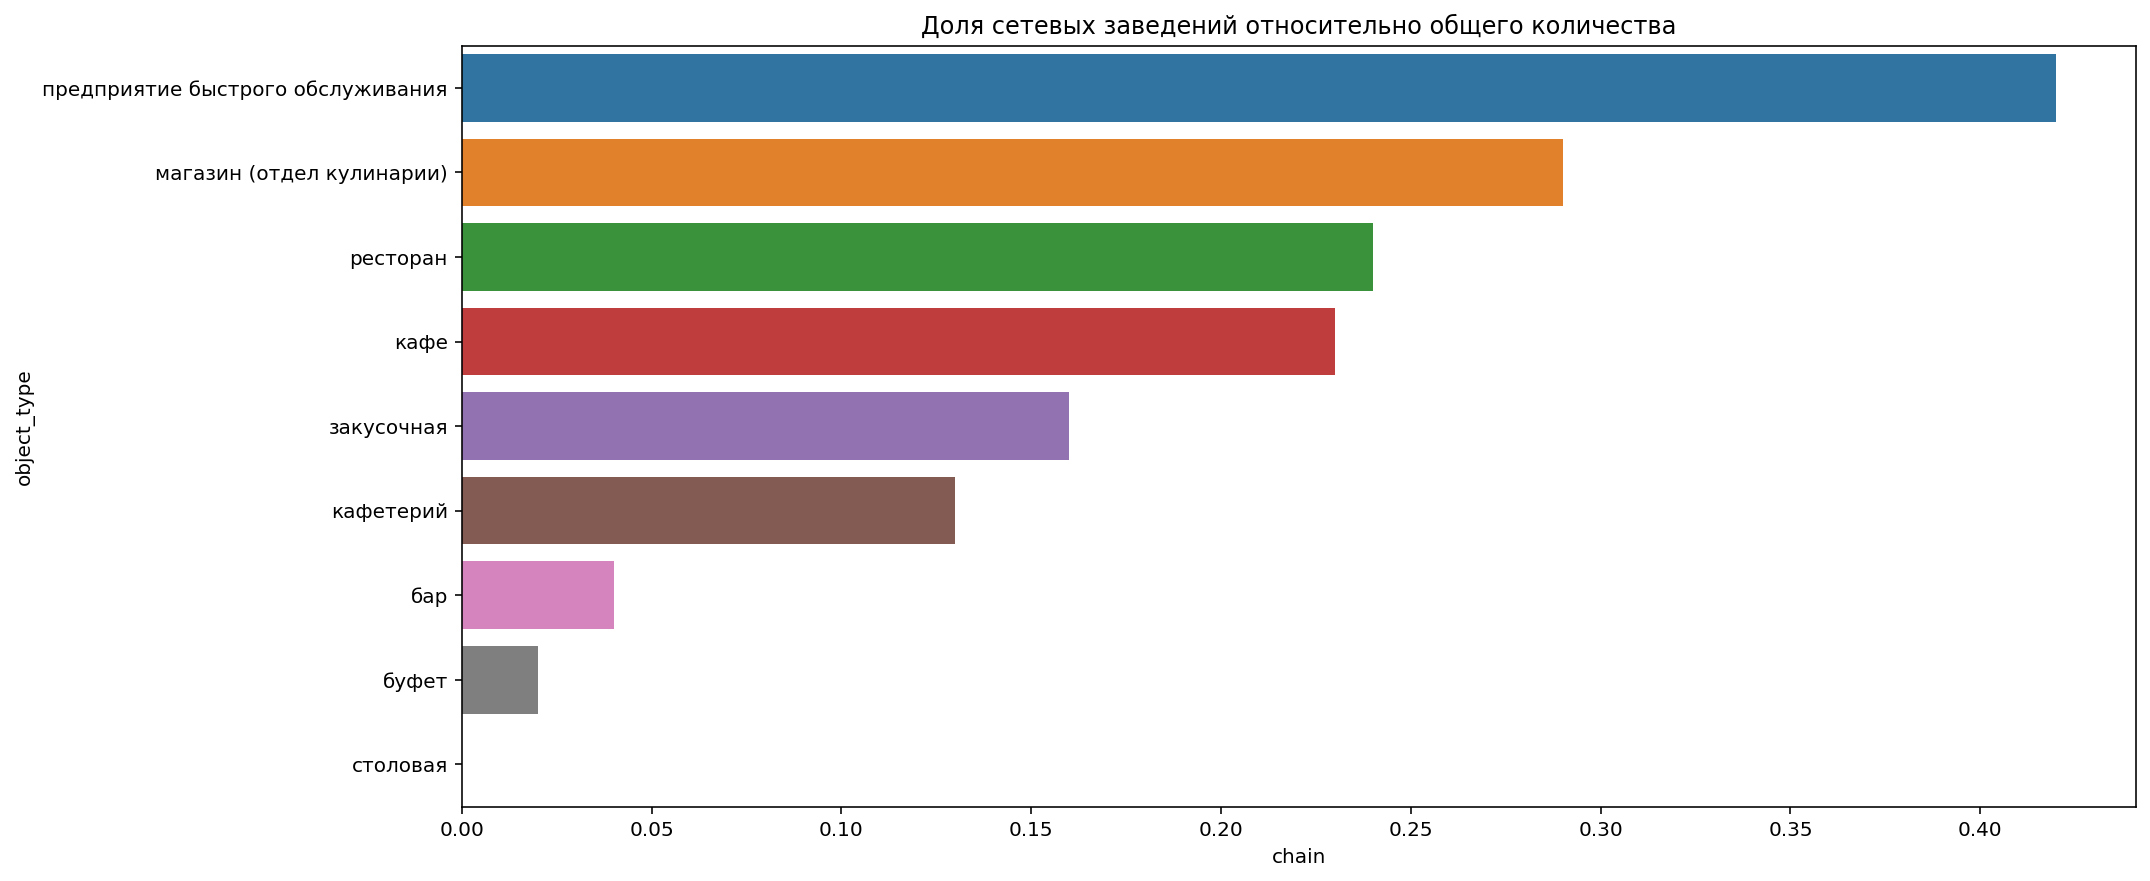

In [21]:
plt.figure(figsize=(15,7))
ax=sns.barplot(x='chain', y="object_type", data=share_chain_all)
ax.set_title('Доля сетевых заведений относительно общего количества')

plt.show()

In [22]:
share_chain = df_temp[df_temp['chain']=='нет'].groupby(['object_type'])['id'].count().to_frame().join(df_temp[df_temp['chain']=='да'].\
         groupby(['object_type'])['number'].count().to_frame())
share_chain['chain'] = (share_chain['number'] / share_chain['id']).round(2)
share_chain = share_chain.reset_index().sort_values(by='chain',ascending=False)

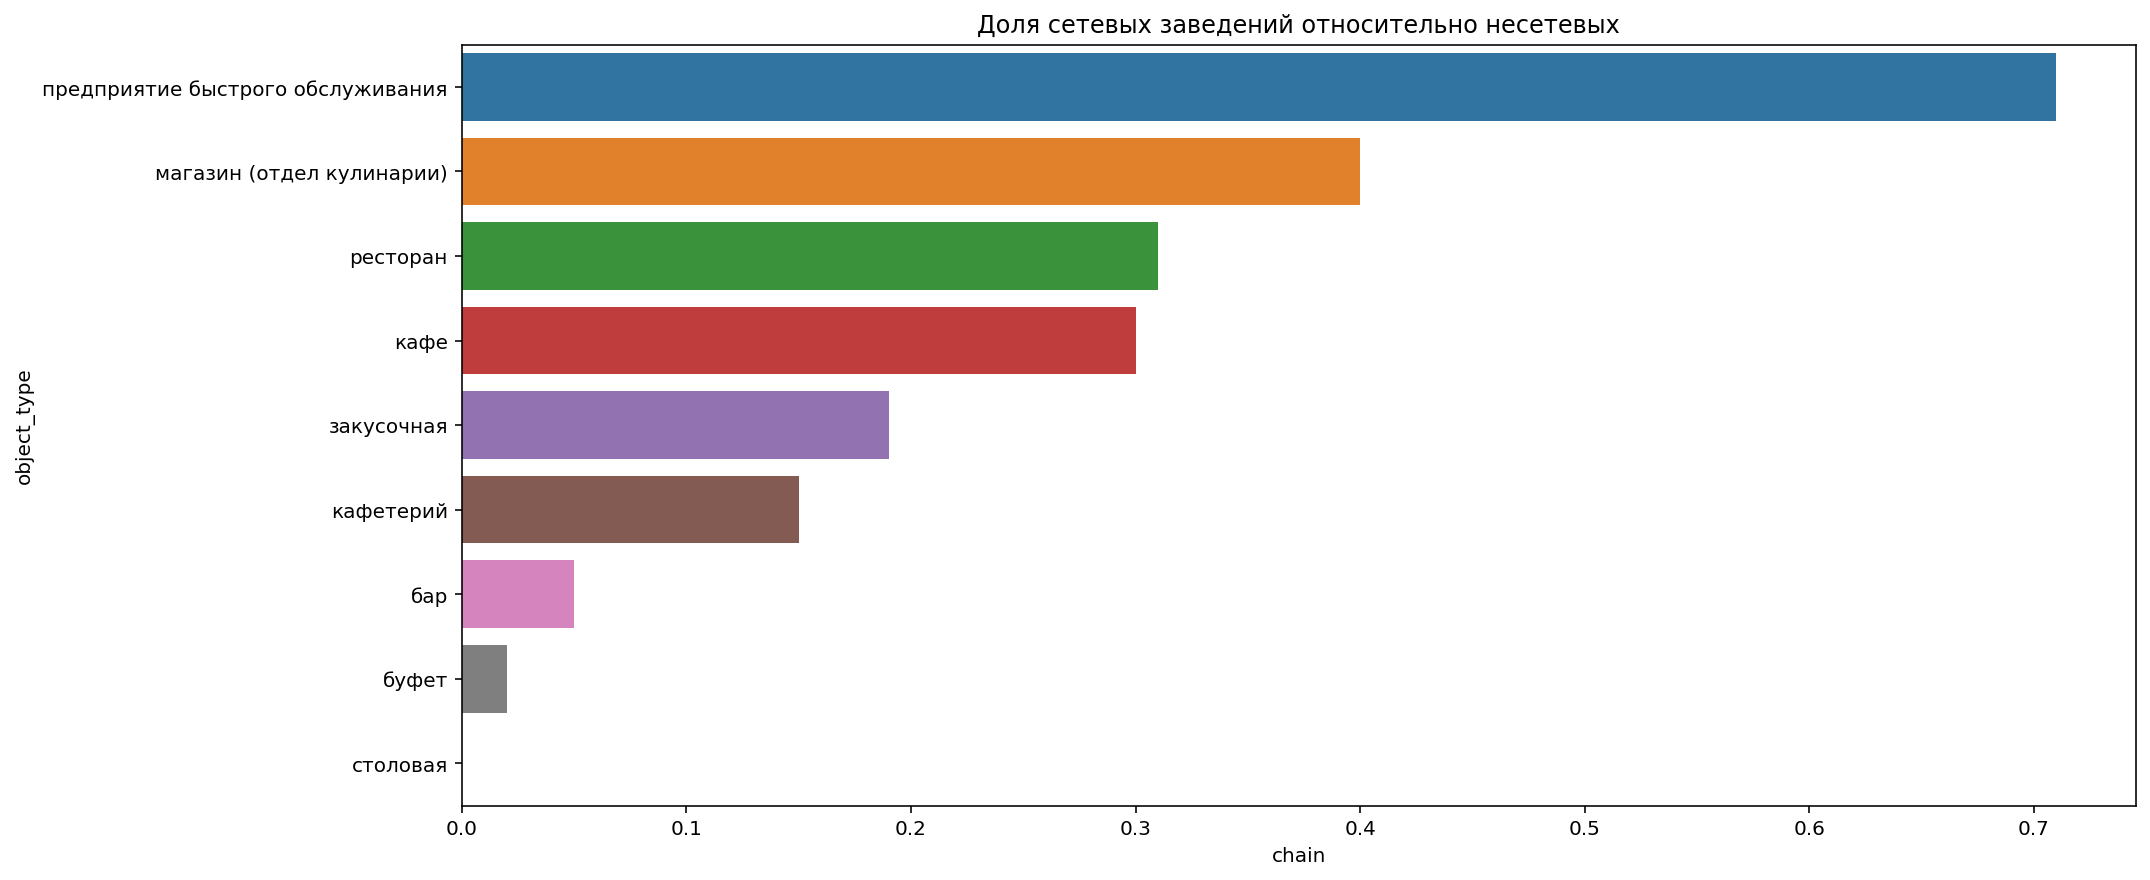

In [23]:
plt.figure(figsize=(15,7))
ax=sns.barplot(x='chain', y="object_type", data=share_chain)
ax.set_title('Доля сетевых заведений относительно несетевых')

plt.show()

Как мы видим доля сетевых заведений полностью меняет картину восприятия заведений в столице, на первом месте идут предприятия быстрого обслуживания, далее кулинария и ресторан примерно на одном уровне с кафе.

In [24]:
df_chain = df_temp.loc[df_temp['chain'] == 'да'].groupby(['object_name'])\
.agg(id_count = ('id','count'),\
     number_mean=('number','mean')).round(2).sort_values(by='id_count',ascending=False).reset_index()
df_chain

,object_name,id_count,number_mean
0,KFC,155,55.34
1,Шоколадница,141,56.17
2,Бургер Кинг,122,45.02
3,Макдоналдс,121,82.17
4,Домино'с Пицца,86,18.21
...,...,...,...
719,Кафе «Марукамэ»,1,40.00
720,Кафе «МЕЛЕНКА»,1,60.00
721,Кафе «МАКДОНАЛДС»,1,40.00
722,Кафе «Кулинарное бюро»,1,18.00


<Figure size 1440x720 with 0 Axes>

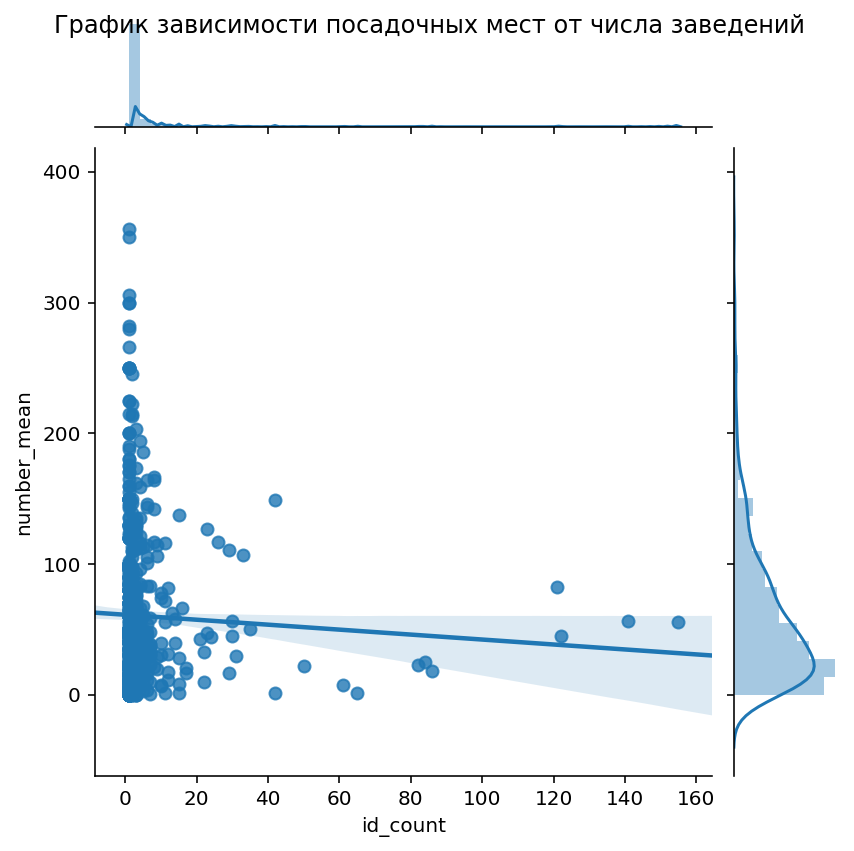

In [25]:
plt.figure(figsize=(20,10))
sns.jointplot(x=df_chain["id_count"], y=df_chain["number_mean"], kind='reg')
plt.suptitle('График зависимости посадочных мест от числа заведений')
plt.show()

Из графика мы видим, что основном в сетевых заведениях, это небольшое количество заведений с небольшим количеством посадочных мест, примерно около 60. Так же мы видим, что есть заведения с 0 посадочных мест, посмотрим на них

In [26]:
df_temp[df_temp['number']==0]

,id,object_name,chain,object_type,address,number
137,115498,Пекарня & Донер,нет,закусочная,"город Москва, Бутырская улица, дом 9, корпус 2",0
154,152556,Шаурма в пите,нет,предприятие быстрого обслуживания,"город Москва, Варшавское шоссе, дом 72, корпус 2",0
157,149568,Суши,нет,предприятие быстрого обслуживания,"город Москва, улица Маршала Василевского, дом ...",0
190,126956,"Шаурма, куры-гриль",нет,предприятие быстрого обслуживания,"город Москва, 1-я Владимирская улица, дом 21",0
195,149531,"Шаурма, куры-гриль",нет,предприятие быстрого обслуживания,"город Москва, 2-я Владимирская улица, дом 44/10",0
...,...,...,...,...,...,...
15334,211228,МИЛТИ,да,магазин (отдел кулинарии),"город Москва, Дубравная улица, дом 34/29",0
15335,211221,МИЛТИ,да,магазин (отдел кулинарии),"город Москва, Пятницкое шоссе, дом 3",0
15336,211209,Готовые блюда Милти,да,предприятие быстрого обслуживания,"город Москва, Ореховый бульвар, дом 22А",0
15337,208477,Милти,да,предприятие быстрого обслуживания,"город Москва, 3-й Крутицкий переулок, дом 18",0


Мы видим, что заведения с 0 посадочных мест это магазины кулинарии, шаурма, суши, вообщем все заведения работающие на вынос, так же в дальнейшем не стоит рассматривать сетевые заведения с 1 заведением в сети.

Добавим столбец с названиями улиц

In [27]:
def rows(row):#функция для взятия первого параметра в столбцах к которым она применяется
    try:
        return''.join(row.split(',')[1].strip())
    except:
        "uknown"

In [28]:
df_temp['street'] =df_temp['address'].apply(rows)

Найдем топ 10 улиц

In [29]:
df_temp.groupby('street')['id'].count().sort_values(ascending=False).iloc[1:11]

street
проспект Мира             204
Профсоюзная улица         181
Ленинградский проспект    170
Пресненская набережная    167
Варшавское шоссе          161
Ленинский проспект        147
поселение Сосенское       137
проспект Вернадского      128
Кутузовский проспект      114
Каширское шоссе           111
Name: id, dtype: int64

Загрузим внешнюю таблицу города Москва по улицам и районам и посчитаем топ 10 улиц по количеству заведений общественного питания

In [30]:
spreadsheet_id = '1WJc9239S6cTks0EvlIH9ZJhh9xfsZ0tS_u0RtBpFfe8'
file_name = 'https://docs.google.com/spreadsheets/d/{}/export?format=csv'.format(spreadsheet_id)
r = requests.get(file_name)
new_tab = pd.read_csv(BytesIO(r.content))
new_tab.head(5)

,streetname,areaid,okrug,area
0,Выставочный переулок,17,ЦАО,Пресненский район
1,улица Гашека,17,ЦАО,Пресненский район
2,Большая Никитская улица,17,ЦАО,Пресненский район
3,Глубокий переулок,17,ЦАО,Пресненский район
4,Большой Гнездниковский переулок,17,ЦАО,Пресненский район


In [31]:
new_tab.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4398 entries, 0 to 4397
Data columns (total 4 columns):
streetname    4398 non-null object
areaid        4398 non-null int64
okrug         4398 non-null object
area          4398 non-null object
dtypes: int64(1), object(3)
memory usage: 137.6+ KB


In [32]:
new_tab.rename(columns={'streetname':'street'},inplace=True)

In [33]:
df_temp.groupby('street')['id'].count().sort_values(ascending=False).iloc[0:10]

street
город Зеленоград          232
проспект Мира             204
Профсоюзная улица         181
Ленинградский проспект    170
Пресненская набережная    167
Варшавское шоссе          161
Ленинский проспект        147
поселение Сосенское       137
проспект Вернадского      128
Кутузовский проспект      114
Name: id, dtype: int64

т.к. город Зеленоград и поселение Сосенское относятся к подмосковью, то их можно не учитывать, большого клиентского трафика не будет

In [34]:
df_group_1 = df_temp[(df_temp['street'] != 'город Зеленоград') & (df_temp['street'] != 'поселение Сосенское')].\
groupby(['street'])['id'].count().sort_values(ascending=False).iloc[0:10].to_frame()
df_group_1

,id
street,
проспект Мира,204
Профсоюзная улица,181
Ленинградский проспект,170
Пресненская набережная,167
Варшавское шоссе,161
Ленинский проспект,147
проспект Вернадского,128
Кутузовский проспект,114
Каширское шоссе,111


Построим график

<Figure size 1080x720 with 0 Axes>

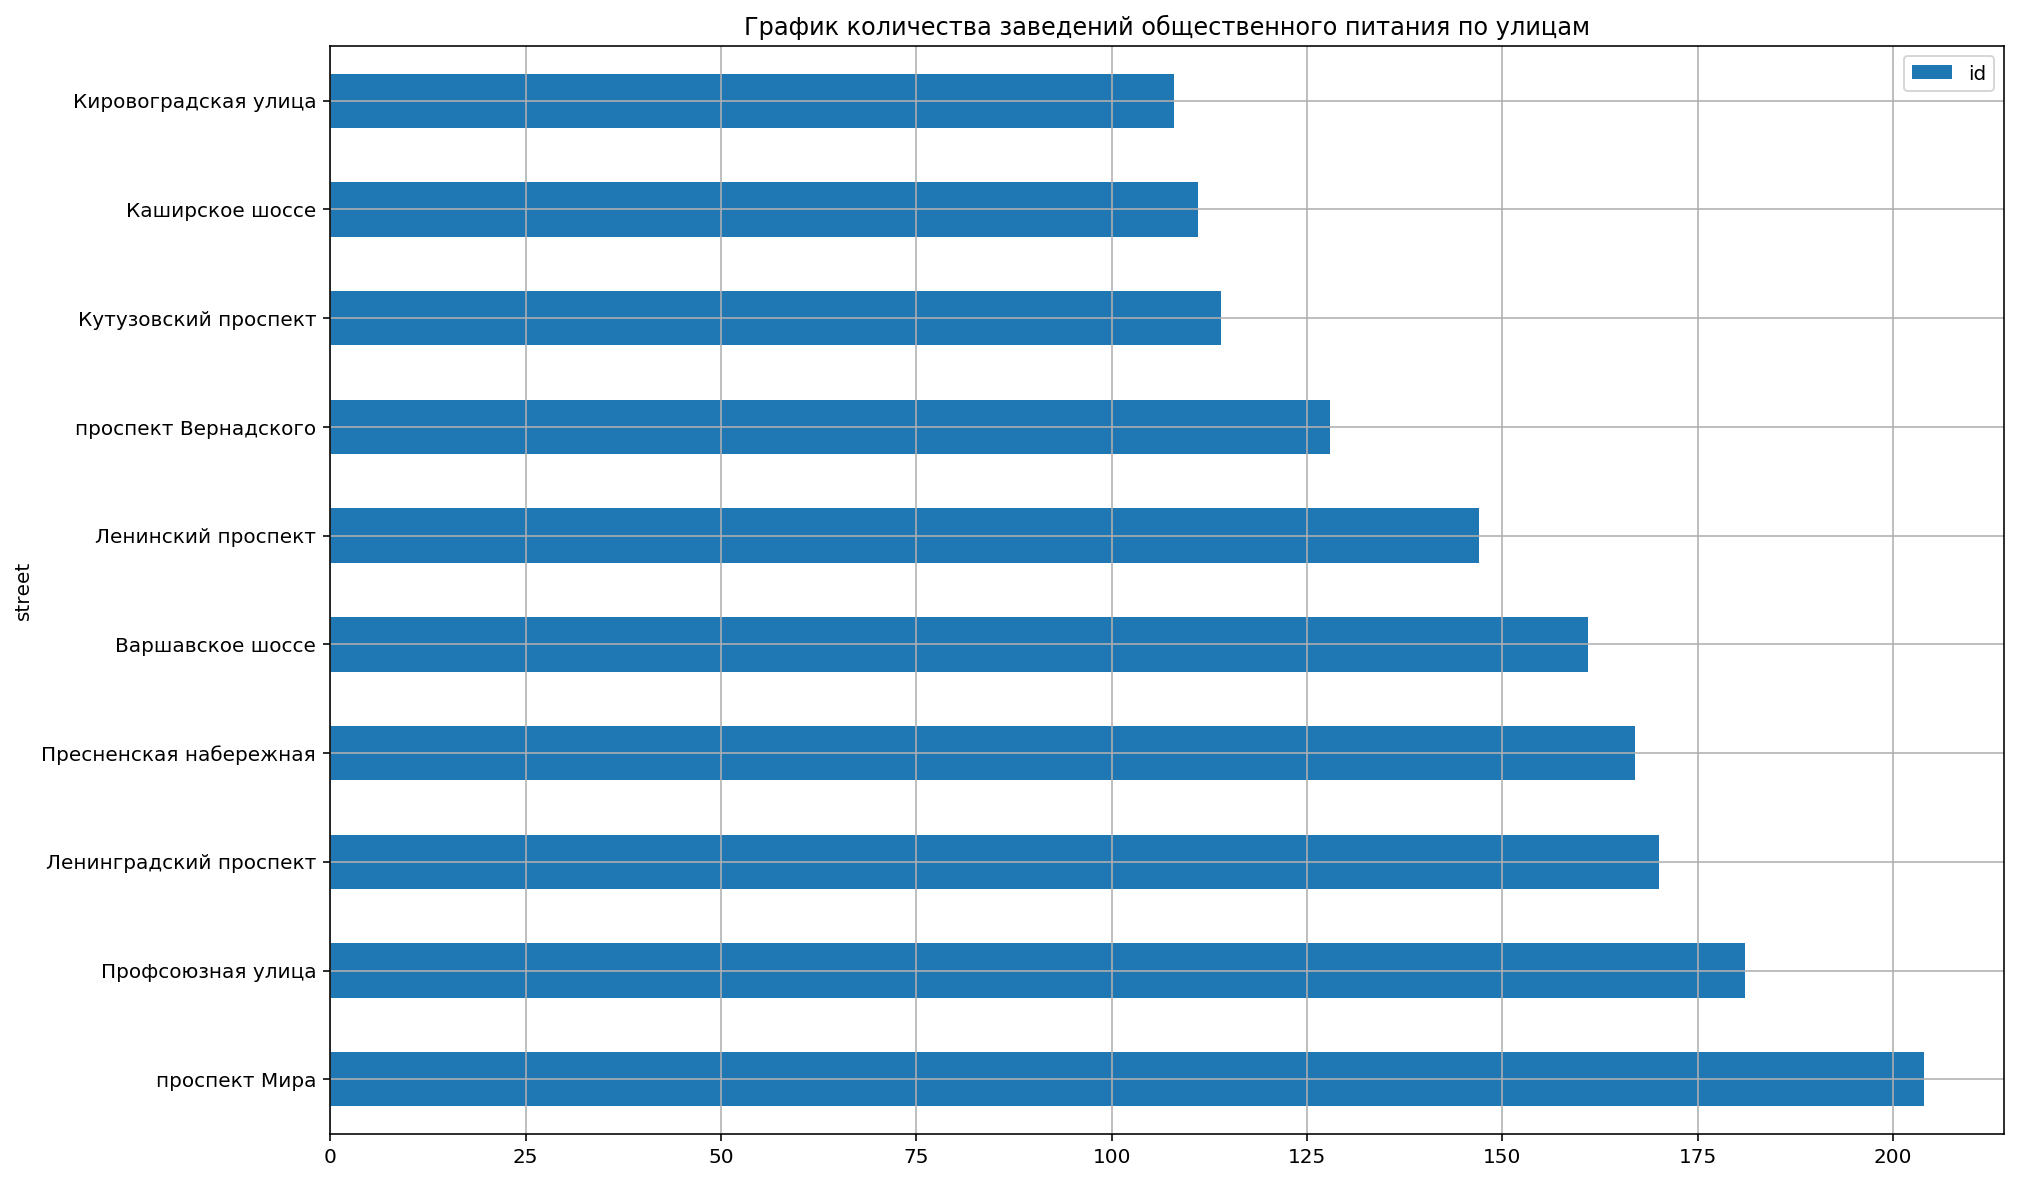

In [35]:
plt.figure(figsize=(15,10))
df_group_1.plot(kind='barh',title='График количества заведений общественного питания по улицам',
                                            figsize=(15,10)
                       )
plt.grid()
plt.show()

Таким образом мы видим, что на каждой улице достаточно заведений общественного питания, посмотрим через сколько районов проходят эти улицы

In [36]:
df_group_2 = new_tab.groupby(['street'])['area'].count().to_frame()

In [37]:
df_join_tab = df_group_1.join(df_group_2)
df_join_tab 

,id,area
street,,
проспект Мира,204,7
Профсоюзная улица,181,6
Ленинградский проспект,170,4
Пресненская набережная,167,1
Варшавское шоссе,161,8
Ленинский проспект,147,8
проспект Вернадского,128,5
Кутузовский проспект,114,2
Каширское шоссе,111,4


Мы видим, что все улицы проходят от 1 до 8 районов, посмотрим на названия районов.

In [38]:
df_join_tab.merge(new_tab, how='left', on='street')

,street,id,area_x,areaid,okrug,area_y
0,проспект Мира,204,7,70,СВАО,Алексеевский район
1,проспект Мира,204,7,86,СВАО,Ярославский Район
2,проспект Мира,204,7,78,СВАО,Район Марьина роща
3,проспект Мира,204,7,79,СВАО,Останкинский район
4,проспект Мира,204,7,81,СВАО,Район Ростокино
5,проспект Мира,204,7,82,СВАО,Район Свиблово
6,проспект Мира,204,7,16,ЦАО,Мещанский район
7,Профсоюзная улица,181,6,123,ЮЗАО,Академический район
8,Профсоюзная улица,181,6,132,ЮЗАО,Район Черемушки
9,Профсоюзная улица,181,6,134,ЮЗАО,Район Ясенево


In [39]:
df_join_tab.merge(new_tab, how='left', on='street')['area_y'].unique()

array(['Алексеевский район', 'Ярославский Район', 'Район Марьина роща',
       'Останкинский район', 'Район Ростокино', 'Район Свиблово',
       'Мещанский район', 'Академический район', 'Район Черемушки',
       'Район Ясенево', 'Район Коньково', 'Обручевский район',
       'Район Теплый Стан', 'Район Аэропорт', 'Район Беговой',
       'Хорошевский район', 'Район Сокол', 'Пресненский район',
       'Район Чертаново Центральное', 'Район Чертаново Северное',
       'Район Чертаново Южное', 'Донской район',
       'Район Нагатино-Садовники', 'Нагорный район',
       'Район Северное Бутово', 'Район Южное Бутово',
       'Район Проспект Вернадского', 'Район Тропарево-Никулино',
       'Район Гагаринский', 'Ломоносовский район', 'Район Якиманка',
       'Район Раменки', 'Район Дорогомилово', 'Район Фили-Давыдково',
       'Район Москворечье-Сабурово', 'Район Орехово-Борисово Южное',
       'Район Орехово-Борисово Северное'], dtype=object)

Таким образом, мы видим что районы через которые проходят улицы абсолютно разные, соответственно и длина самих улиц будет очень большой.

Найдем количество улиц с одним объектом общественного питания

In [40]:
df_temp.groupby(['street'])['id'].count()[df_temp.groupby(['street'])['id'].count()==1].count()

579

Чтож их не так много, но  нас они не интересуют, так как трафик будет оч маленький

Найдем районы к которым относятся эти заведения

In [41]:
df_1_institut = df_temp.groupby(['street'])['id'].count()[df_temp.groupby(['street'])['id'].count()==1].to_frame()

In [42]:
df_all_group = df_1_institut.join(df_group_2).merge(new_tab, how='left', on='street')
df_all_group.groupby('area_y')['street'].count().sort_values(ascending=False).head(15)

area_y
Таганский район         27
Район Хамовники         26
Басманный район         25
Тверской район          20
Пресненский район       19
Район Марьина роща      18
Район Арбат             17
Мещанский район         16
Район Сокольники        15
Район Замоскворечье     14
Район Лефортово         12
Район Соколиная Гора    12
Даниловский район       12
Район Якиманка          11
Район Богородское       10
Name: street, dtype: int64

Мы видим, что это все центральные районы Москвы со своим множеством маленьких улиц, и единственным заведением на каждой улице ввиду их короткой длины и исторического центра города, именно поэтому они нас не устраивают.

Посмотрим на распределение количества посадочных мест для улиц с большим количеством объектов общественного питания

In [43]:
df_temp[(df_temp['street'] != 'город Зеленоград') & (df_temp['street'] != 'поселение Сосенское')].\
groupby(['street']).agg(count_object_type=('object_type','count'),\
                              mean_number=('number','mean')).sort_values(by='count_object_type', ascending=False).iloc[0:10]

,count_object_type,mean_number
street,,
проспект Мира,204,62.696078
Профсоюзная улица,181,46.668508
Ленинградский проспект,170,52.764706
Пресненская набережная,167,45.844311
Варшавское шоссе,161,52.875776
Ленинский проспект,147,63.469388
проспект Вернадского,128,68.804688
Кутузовский проспект,114,85.061404
Каширское шоссе,111,55.504505


Мы видим, что среднее количество посадочных мест варьируется от 45 до 85 в зависимости от улицы

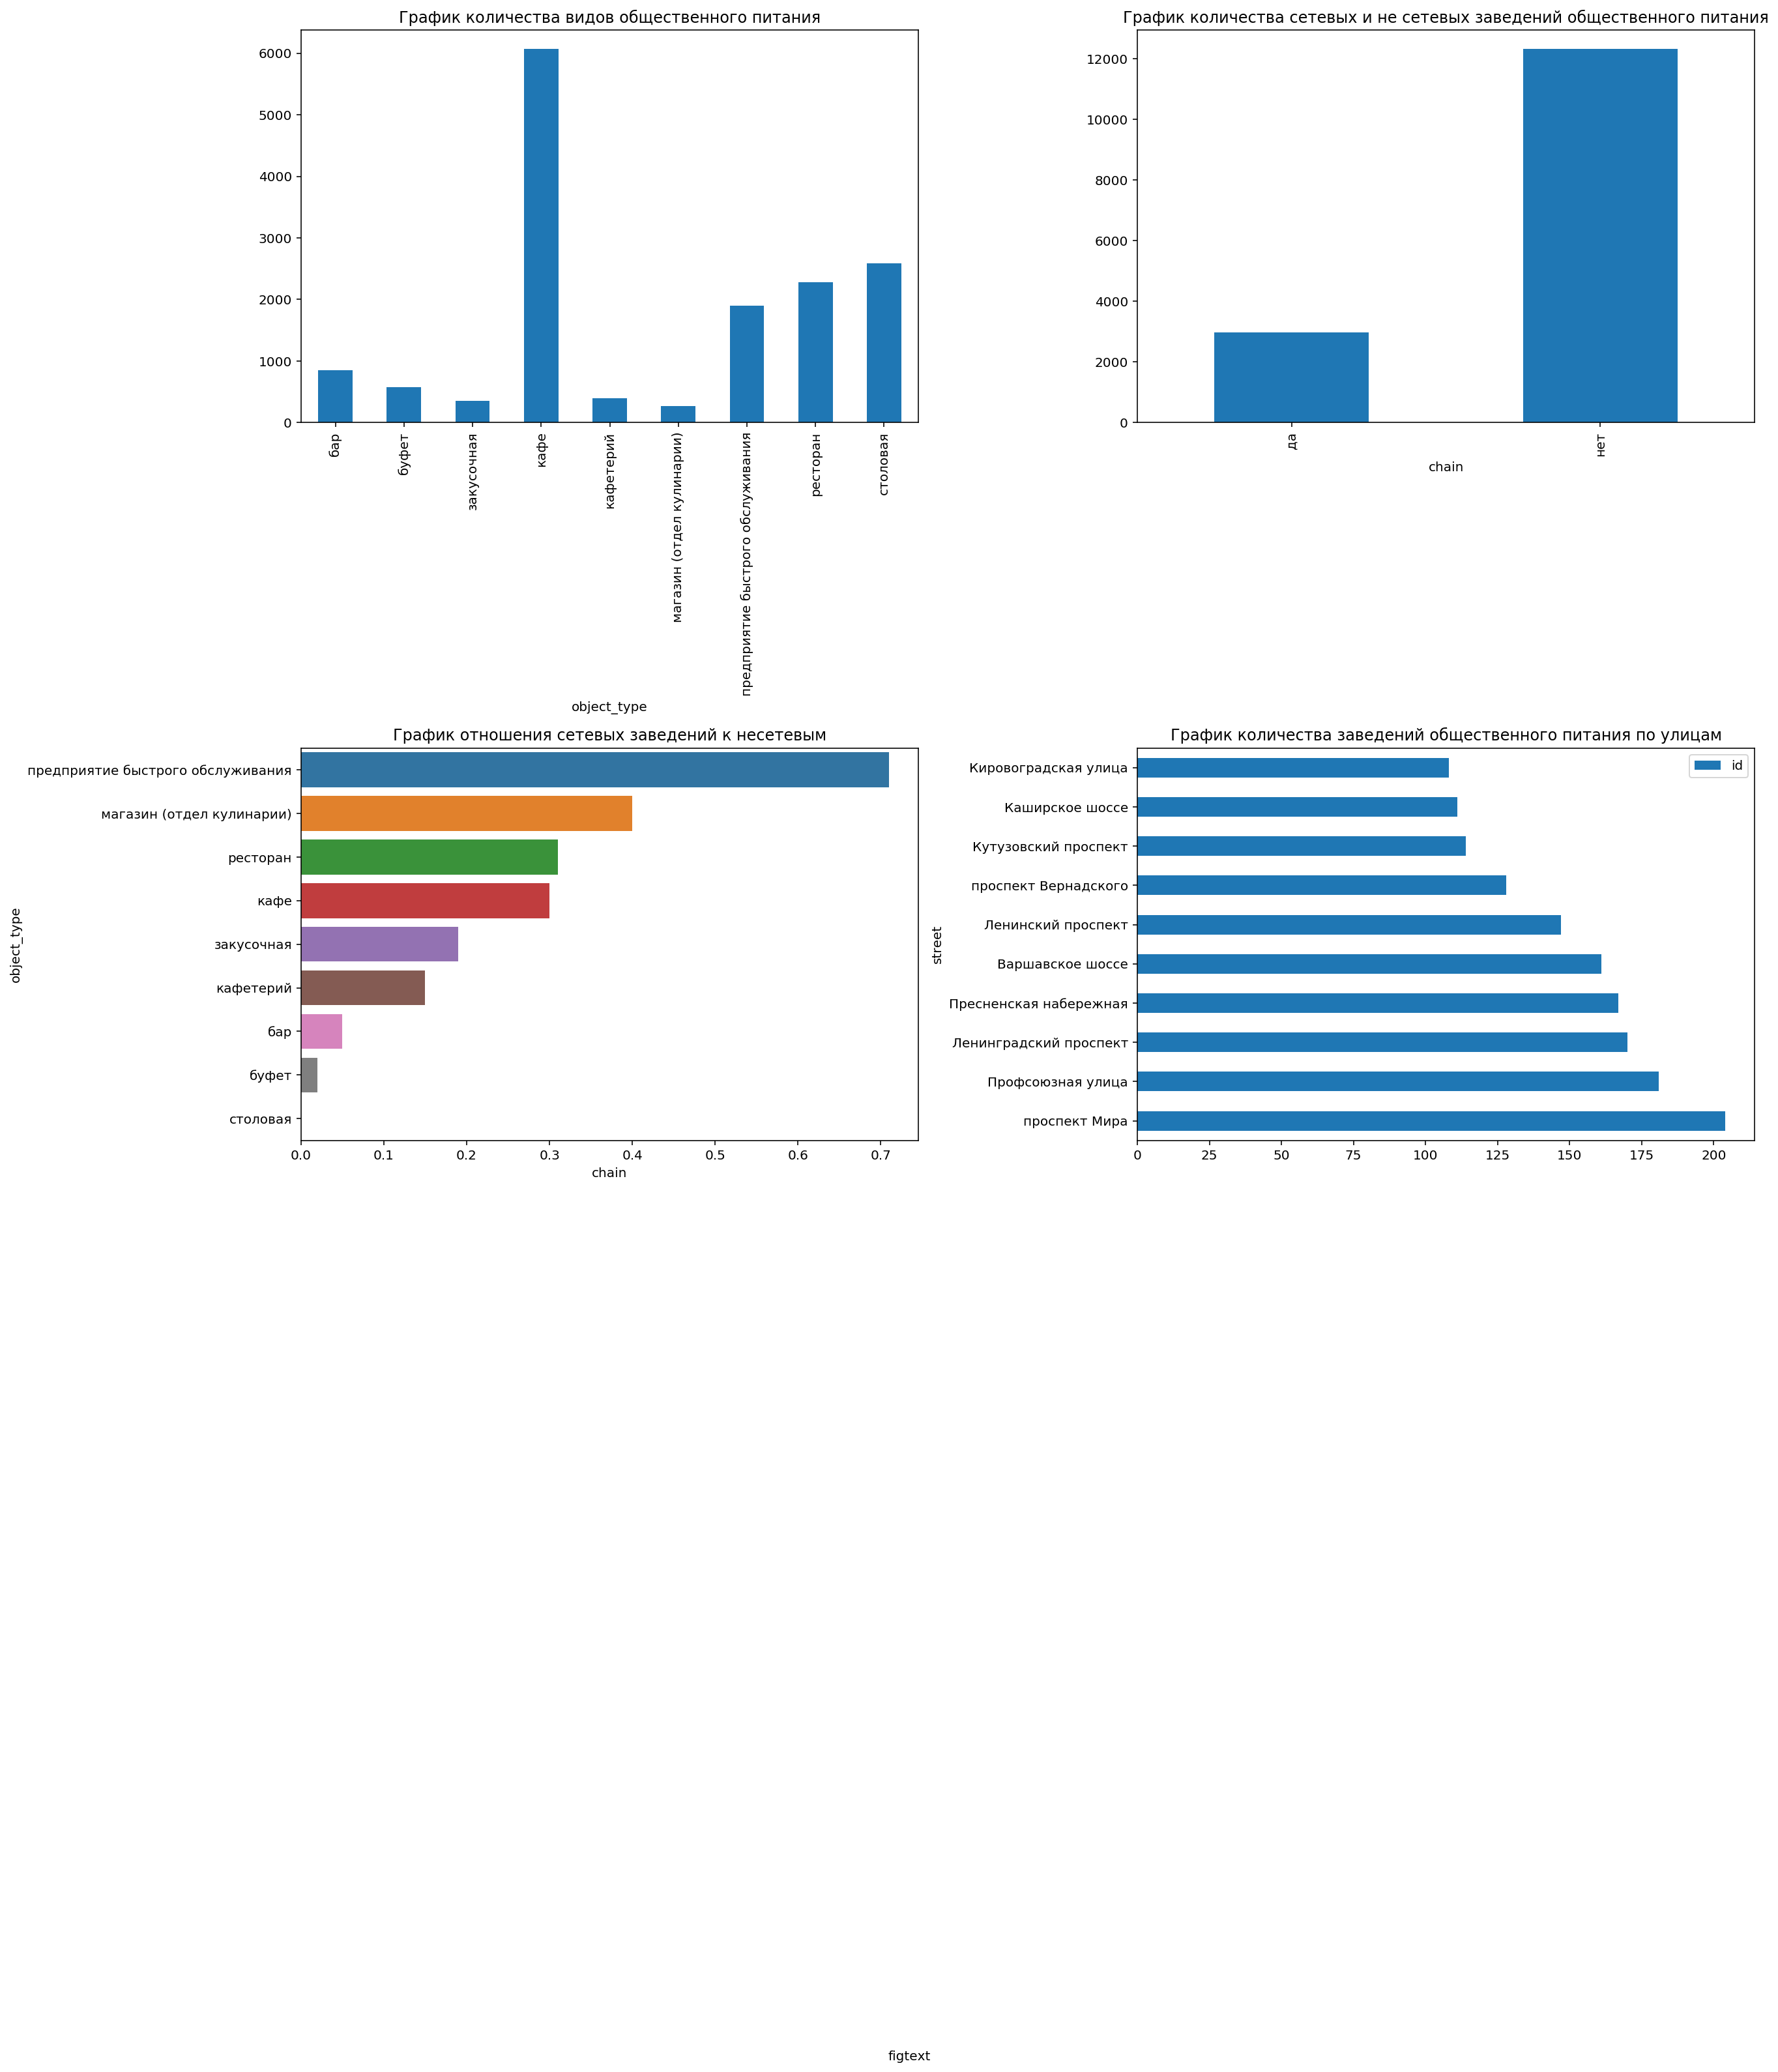

In [44]:
fig = plt.figure(figsize=(19,20))
plt.figtext(0.5, -0.1, "figtext")

ax1 = fig.add_subplot(3,2,1)
ax2 = fig.add_subplot(3,2,2)
ax3 = fig.add_subplot(3,2,3)
ax4 = fig.add_subplot(3,2,4)



df_temp.groupby('object_type')['id'].count().plot(kind='bar',
                                             title='График количества видов общественного питания',
                                            ax=ax1)


df_temp.groupby('chain')['id'].count().plot(kind='bar',
                title='График количества сетевых и не сетевых заведений общественного питания',
                ax=ax2
                )

plt.subplot(323)
plt.title('График отношения сетевых заведений к несетевым')
sns.barplot(x='chain', y="object_type", data=share_chain, ax=ax3)

df_group_1.plot(kind='barh',title='График количества заведений общественного питания по улицам',ax=ax4)



fig.tight_layout()


## Вывод:

 - Таким образом мы выяснили, что основное место среди общего количества общественных заведений занимает кафе, в свою очередь по доле сетевых заведений занимает предприятия быстрого обслуживания, затем ресторан  и только после них идет кафе, количество посадочных мест 60-70 так как нам надо найти один район через который проходит одна улица, то это улица Пресненская набережная, Пресненский район, не самое большое количество открытых точек питания и к тому же входит в топ 10 улиц. 
 - В дальнейшем для развития сети заведений  необходимо так же можно рассматривать Кутузовский проспект, Кировоградская улица, Ленинградский проспект, Каширское шоссе это улицы с 2-4 районами с не самым большим количеством открытых заведений. Так же можно расмотреть на перспективу роботизированный магазин кулинарии и предприятия быстрого обслуживания, веь они действительно пользуются спросом